In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DRIVE_PATH = "/content/drive/MyDrive/MTechCSE_2020/Term_Paper/Sem_6_analysis/YoloV8"

In [ ]:
# Root directory of the project
CURR_DIR = "/content/YoloV8"

In [ ]:
!rm -rf CURR_DIR

In [ ]:
#ignore all Warnings
import warnings; warnings.simplefilter('ignore')

In [ ]:
import shutil
import os
import sys
def loadToMemory():
  if not os.path.exists(CURR_DIR):
    shutil.copytree(DRIVE_PATH, CURR_DIR)
  else:
      print(f"YoloV8 Folder exsist")

In [ ]:
loadToMemory()

YoloV8 Folder exsist


In [ ]:
import os
os.chdir('./YoloV8')
os.getcwd()

In [ ]:
!ls

BrainTumor_YoloV8.ipynb  dataset  data.yaml  runs  yolov8n.pt  yolov8n-seg.pt


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
!pip install ultralytics

In [ ]:
DATASET_TRAIN_DIR = "./dataset/train"

!ls $DATASET_TRAIN_DIR

images	labels


In [ ]:
import os

from ultralytics import YOLO

# model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8l-seg.pt')
model.train(data='./data.yaml', epochs=100, batch=64, patience=2, imgsz=640)
# epochs=30 patience=2 imgsz=640 optimizer='SGD'



In [ ]:
!scp -r "./runs" "/content/drive/MyDrive/MTechCSE_2020/Term_Paper/Sem_6_analysis/YoloV8"

In [ ]:
from ultralytics.yolo.engine.model import TASK_MAP
import cv2


model_path = './runs/segment/train/weights/best.pt'

model = YOLO(model_path, task='detect')

metrics = model.val(data='./data.yaml')


Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients
val: Scanning /content/YoloV8/dataset/valid/labels.cache... 201 images, 74 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]
                   all        201        128      0.605      0.883      0.688      0.541      0.612      0.891       0.68       0.51
Speed: 4.0ms preprocess, 7.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/segment/val3


In [ ]:
from ultralytics.yolo.engine.model import TASK_MAP
import cv2


model_path = './runs/segment/train/weights/best.pt'

image_path = './dataset/test/images/'

# img = cv2.imread(image_path)
# H, W, _ = img.shape

model = YOLO(model_path, task='segment')

# results = model(img)
results = model.predict(image_path, conf=0.25)

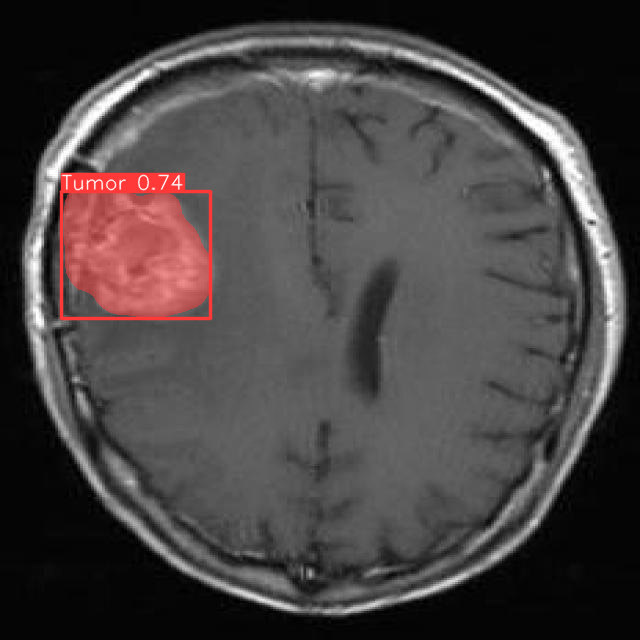

In [ ]:
from PIL import Image
Image.fromarray(results[0].plot()[:,:,::-1])

In [ ]:
from IPython.display import display, Image

In [ ]:
!yolo task=segment mode=predict model='./runs/segment/train/weights/best.pt' conf=0.25 source='./dataset/test/images'

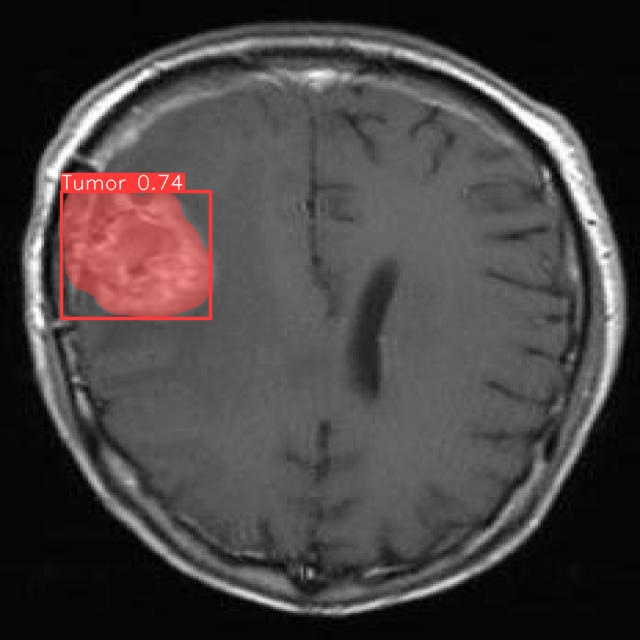

In [ ]:
Image(filename='./runs/segment/predict/y701_jpg.rf.81a4472f77fdc1f31537342ceca340c9.jpg', width=600)

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/runs/classify/train2/results.png', height=800)